# MNIST Digit Classification using TensorFlow

## Introduction
This notebook will demonstrate an end-to-end machine learning project with TensorFlow and Keras using the MNIST dataset, a collection of handwritten digits. We will explore different neural network architectures and compare their performance in digit classification.

## 1. Data Loading
The MNIST dataset is conveniently included in TensorFlow's dataset library.

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255
X_test  = X_test.reshape (60000, 28, 28, 1).astype('float32') / 255

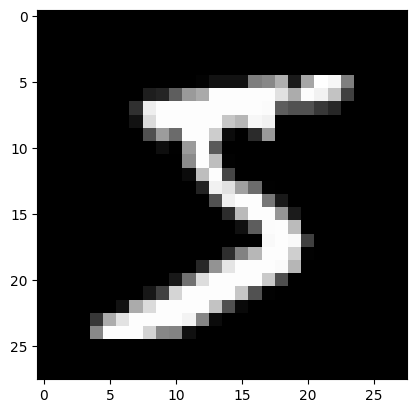

In [32]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [33]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape((1,784)), cmap='gray')
plt.axis('off')
plt.show()

## 2. Data Preprocessing
The images are normalized to have values between 0 and 1. Labels are one-hot encoded.

In [34]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

## 3. Building Neural Network Models
We will construct three different models: a basic ANN, a LeNet-5 inspired CNN, and a more complex CNN.

### 3.1 Basic ANN Model

In [35]:
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 3.2 LeNet-5 Inspired CNN Model

In [36]:
model_lenet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 3.3 A More Complex CNN Model

In [37]:
model_complex = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_complex.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 4. Training the Models
Train each model and capture their training histories.

In [38]:
history_ann     = model_ann.fit    (X_train, y_train, epochs=10, validation_split=0.1)
history_lenet   = model_lenet.fit  (X_train, y_train, epochs=10, validation_split=0.1)
history_complex = model_complex.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8664 - loss: 0.4634 - val_accuracy: 0.9618 - val_loss: 0.1329
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9624 - loss: 0.1311 - val_accuracy: 0.9705 - val_loss: 0.0987
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9746 - loss: 0.0864 - val_accuracy: 0.9742 - val_loss: 0.0866
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9814 - loss: 0.0598 - val_accuracy: 0.9768 - val_loss: 0.0754
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9864 - loss: 0.0465 - val_accuracy: 0.9778 - val_loss: 0.0736
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9895 - loss: 0.0356 - val_accuracy: 0.9787 - val_loss: 0.0783
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9916 - loss: 0.0285 - val_accuracy: 0.9763 - val_loss: 0.0922
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9936 - loss: 0.0231 -

KeyboardInterrupt: 

## 5. Evaluating and Comparing Model Performance
Compare the performance of the models based on their accuracy on the test set.

In [39]:
test_loss_ann, test_acc_ann = model_ann.evaluate(X_test, y_test, verbose=2)
test_loss_lenet, test_acc_lenet = model_lenet.evaluate(X_test, y_test, verbose=2)
test_loss_complex, test_acc_complex = model_complex.evaluate(X_test, y_test, verbose=2)

print(f'ANN Test Accuracy: {test_acc_ann:.4f}')
print(f'LeNet-5 Inspired CNN Test Accuracy: {test_acc_lenet:.4f}')
print(f'Complex CNN Test Accuracy: {test_acc_complex:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.9764 - loss: 0.0869
313/313 - 2s - 5ms/step - accuracy: 0.9884 - loss: 0.0446
313/313 - 11s - 36ms/step - accuracy: 0.9878 - loss: 0.0360
ANN Test Accuracy: 0.9764
LeNet-5 Inspired CNN Test Accuracy: 0.9884
Complex CNN Test Accuracy: 0.9878


## 6. Conclusion
Summarize findings, discuss which model performed best, and suggest potential improvements or further experiments.

In [ ]:
model_ann.save('model_ann.h5')
model_lenet.save('model_lenet.h5')
model_complex.save('model_complex.h5')